# Лабораторная работа №1: Описательная статистика, визуализация, предварительная обработка данных
Часть 2

Найти датасет с аномальными значениями, которые можно выявить, построив диаграмму размаха «ящик с усами». Попробовать выдвинуть гипотезу о причинах аномальности, которую можно подтвердить дальнейшими исследованиями, используя синтетические признаки (или корреляционный анализ и т.п.).

https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# Загрузка датасета
credit_data = pd.read_csv("../Lab-1/Data/creditcard.csv")
print(data.head()) 

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

# Построение диаграммы размаха (ящик с усами) для выявления аномальных значений

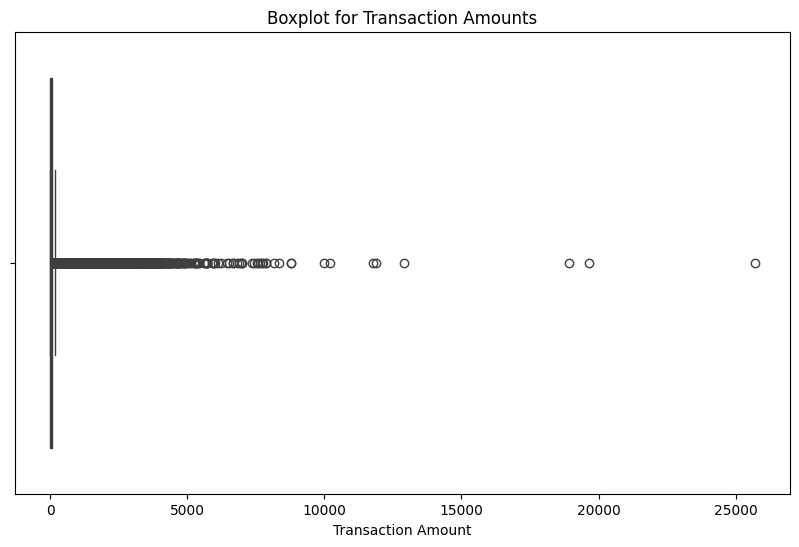

In [8]:

# Построение диаграммы размаха для столбца с транзакциями (например, 'Amount')
plt.figure(figsize=(10, 6))
sns.boxplot(x=credit_data['Amount'])
plt.title('Boxplot for Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.show()


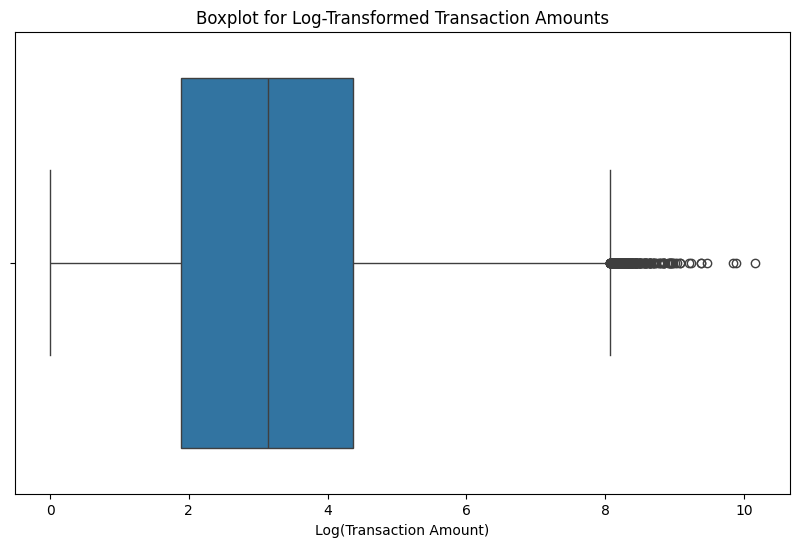

In [9]:
# Логарифмическое преобразование значений для улучшения визуализации
credit_data['Log_Amount'] = credit_data['Amount'].apply(lambda x: np.log(x + 1))  # Добавляем 1 для избежания логарифма от 0

# Построение диаграммы размаха для логарифмированных значений
plt.figure(figsize=(10, 6))
sns.boxplot(x=credit_data['Log_Amount'])
plt.title('Boxplot for Log-Transformed Transaction Amounts')
plt.xlabel('Log(Transaction Amount)')
plt.show()


In [10]:
# Вычисление первого (Q1) и третьего (Q3) квартилей
Q1 = credit_data['Amount'].quantile(0.25)
Q3 = credit_data['Amount'].quantile(0.75)

# Вычисление межквартильного размаха (IQR)
IQR = Q3 - Q1

# Определение границ для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Фильтрация выбросов
outliers = credit_data[(credit_data['Amount'] < lower_bound) | (credit_data['Amount'] > upper_bound)]

# Вывод информации о выбросах
print(f'Количество выбросов: {len(outliers)}')
print(outliers.head())


Количество выбросов: 31904
    Time        V1        V2        V3        V4        V5        V6  \
2    1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
20  16.0  0.694885 -1.361819  1.029221  0.834159 -1.191209  1.309109   
51  36.0 -1.004929 -0.985978 -0.038039  3.710061 -6.631951  5.122103   
64  42.0 -0.522666  1.009923  0.276470  1.475289 -0.707013  0.355243   
85  55.0 -4.575093 -4.429184  3.402585  0.903915  3.002224 -0.491078   

          V7        V8        V9  ...       V22       V23       V24       V25  \
2   0.791461  0.247676 -1.514654  ...  0.771679  0.909412 -0.689281 -0.327642   
20 -0.878586  0.445290 -0.446196  ... -0.571955 -0.050881 -0.304215  0.072001   
51  4.371691 -2.006868 -0.278736  ... -0.381671  0.969719  0.019445  0.570923   
64  1.559849 -0.399579 -0.479813  ...  1.011543  0.069666  0.157820 -1.109224   
85 -2.705393  0.666451  1.922216  ...  0.853360 -0.971600 -0.114862  0.408300   

         V26       V27       V28   Amount  Class  Log

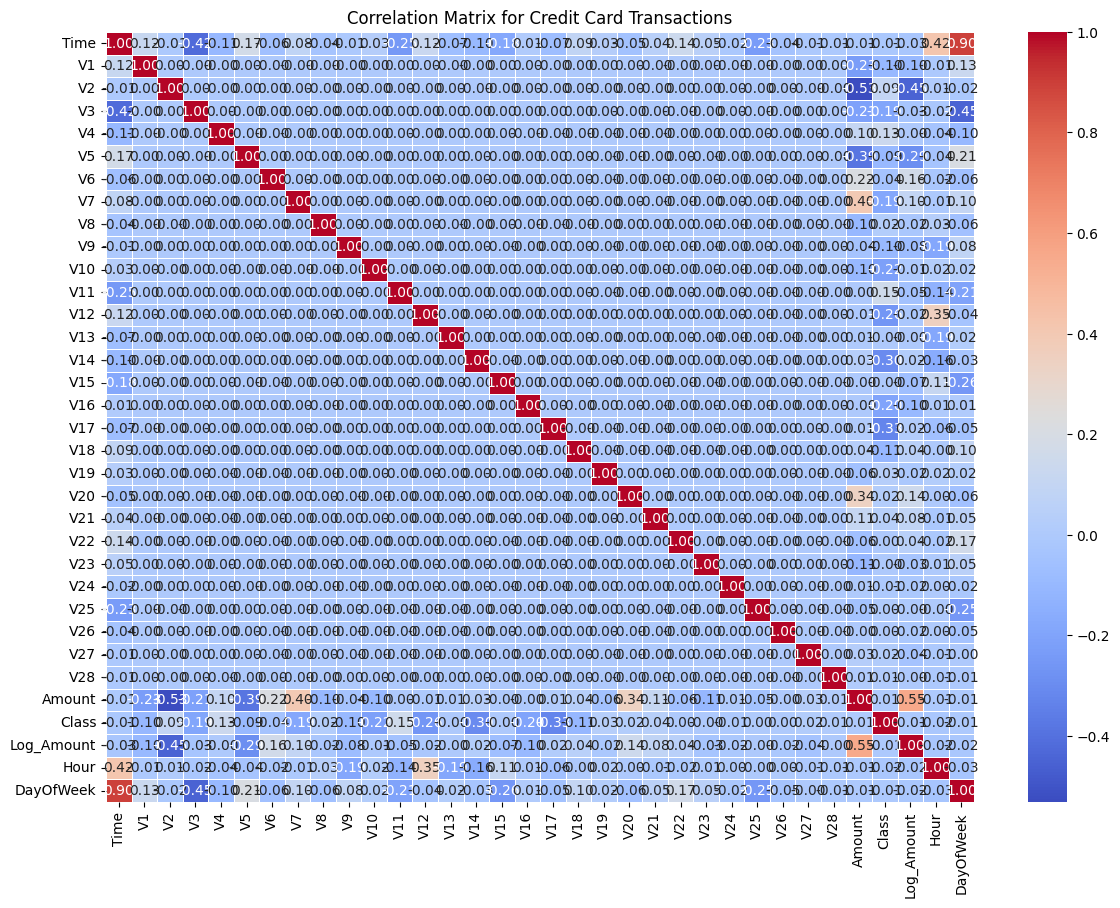

In [13]:
# Вычисление корреляционной матрицы
correlation_matrix = credit_data.corr()

# Визуализация корреляционной матрицы
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Credit Card Transactions')
plt.show()


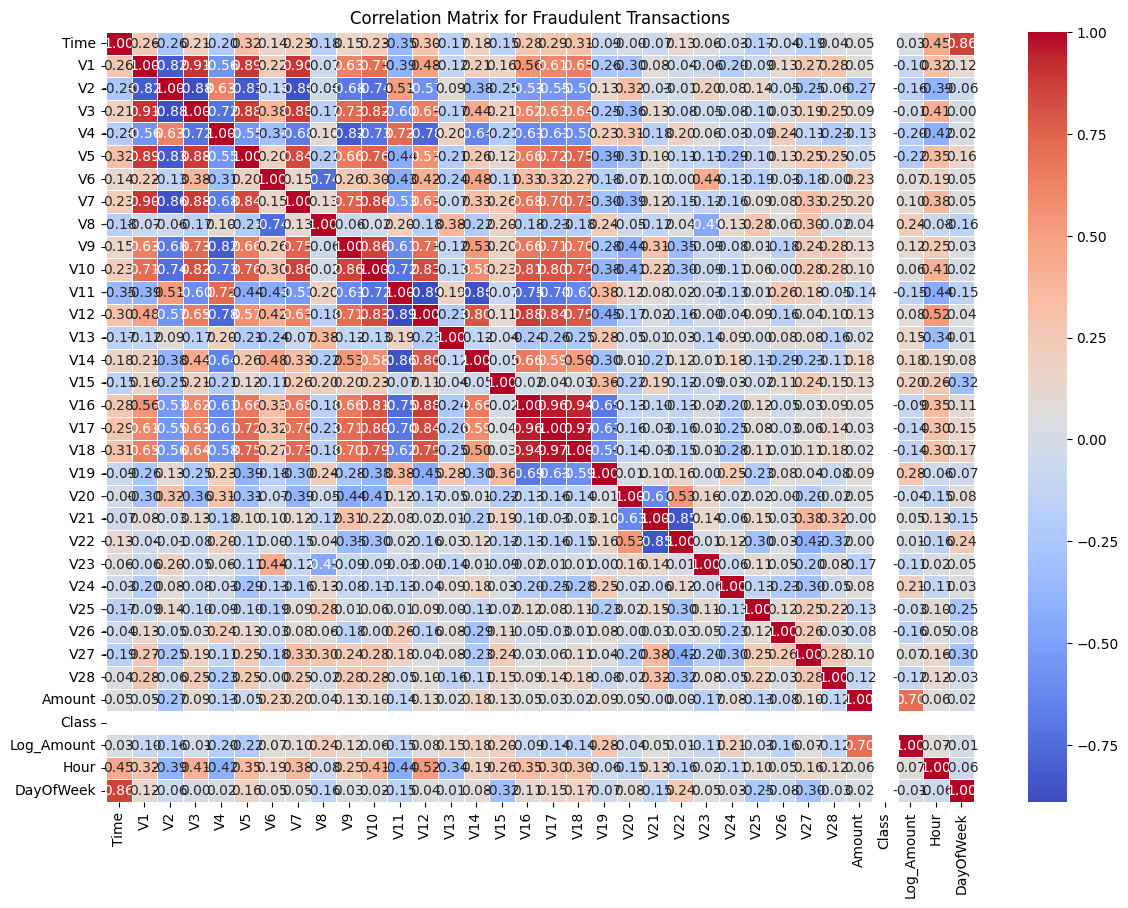

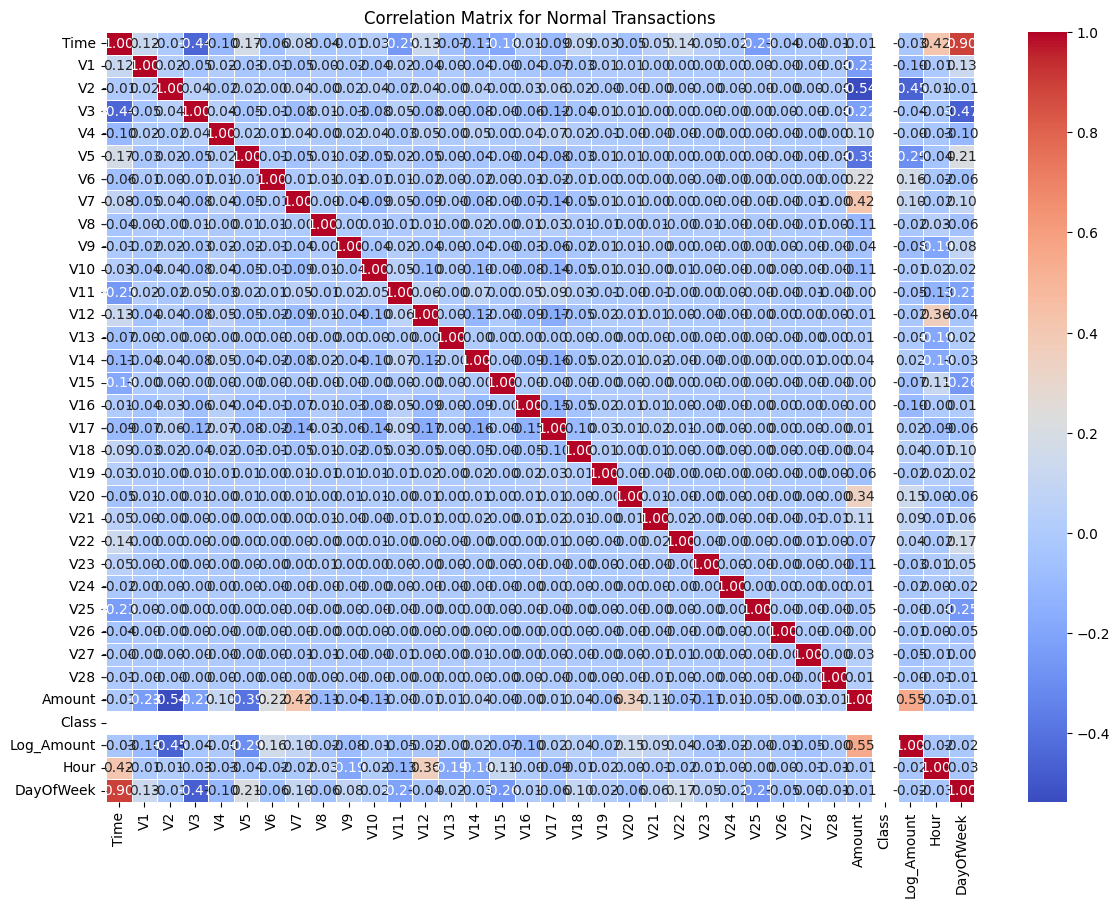

In [14]:
# Разделение данных на мошеннические и обычные транзакции
fraudulent_transactions = credit_data[credit_data['Class'] == 1]
normal_transactions = credit_data[credit_data['Class'] == 0]

# Корреляционная матрица для мошеннических транзакций
fraud_corr = fraudulent_transactions.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(fraud_corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Fraudulent Transactions')
plt.show()

# Корреляционная матрица для обычных транзакций
normal_corr = normal_transactions.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(normal_corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Normal Transactions')
plt.show()


    Анализ датасета о транзакциях с кредитными картами показывает, что мошеннические транзакции составляют лишь 0.172% от общего числа, что создает значительную несбалансированность классов. Использование различных методов машинного обучения, таких как логистическая регрессия и алгоритмы обнаружения аномалий, позволяет выявить определенные паттерны мошенничества, однако традиционные модели могут иметь высокую точность, не достигая при этом адекватного уровня полноты в обнаружении редких случаев.

    Гипотезы:
    
Мошенничество может быть связано с определёнными временными паттернами:
Мошеннические транзакции могут происходить чаще в определённые часы суток или дни недели, когда наблюдается меньший контроль.

Аномальные суммы транзакций:
Мошеннические транзакции могут иметь аномально низкие или высокие суммы, отличающиеся от нормального диапазона, что может свидетельствовать о попытках мошенничества.

Зависимость между PCA-признаками:
Некоторые компоненты PCA (V1-V28) могут иметь сильные корреляции с классом мошенничества, указывая на наличие определённых закономерностей в данных, связанных с мошенническими действиями.

Эти гипотезы могут быть проверены с помощью дальнейшего анализа данных и применения различных методов машинного обучения для улучшения обнаружения мошенничества.